# TT Field

**-Reference:** [Tinyakov and Tkachev (2001)](https://arxiv.org/abs/astro-ph/0102101)

**-Orignal Implementation:** Hammurabi (old) [(code](https://sourceforge.net/projects/hammurabicode/), [paper)](https://arxiv.org/abs/0807.2262)

**-Default parameters constrained using (see reference publication):**  Ultra-high energy cosmic rays (UHECR) observed by AGASA and Yakutsk experiment

In [17]:
import ImagineModels as img
from plotting_helpers import plot_slice

#### 1. Visualizing the model

In [18]:
model = img.TTMagneticField()
shape = [100, 100, 20] # necessarily a list of 3 ints! 
increment = [.20, .20, .20]  
refpoint = [-10., -10., -2.]
vmin = -1
vmax = 1

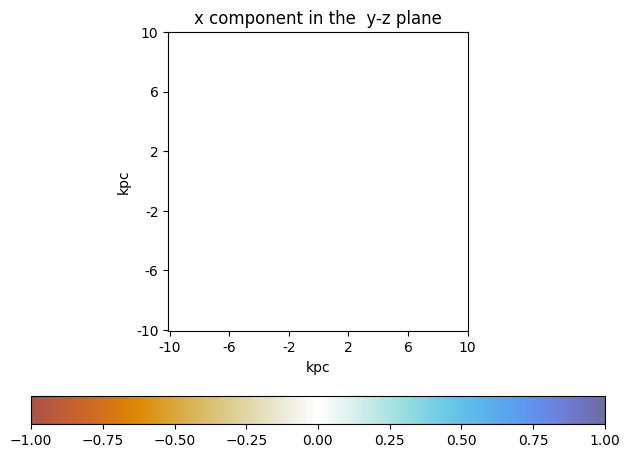

In [19]:
model_on_grid = model.on_grid(shape=shape, reference_point=refpoint, increment=increment)
plot_slice(model_on_grid, 0, 2, shape, refpoint, increment, vmin, vmax)

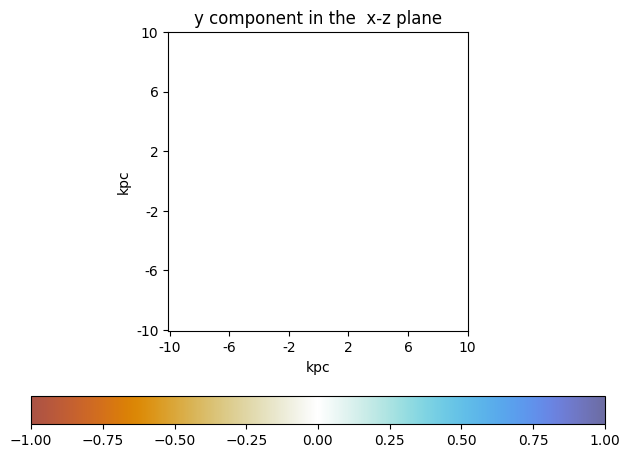

In [20]:
plot_slice(model_on_grid, 1, 2, shape, refpoint, increment, vmin, vmax)

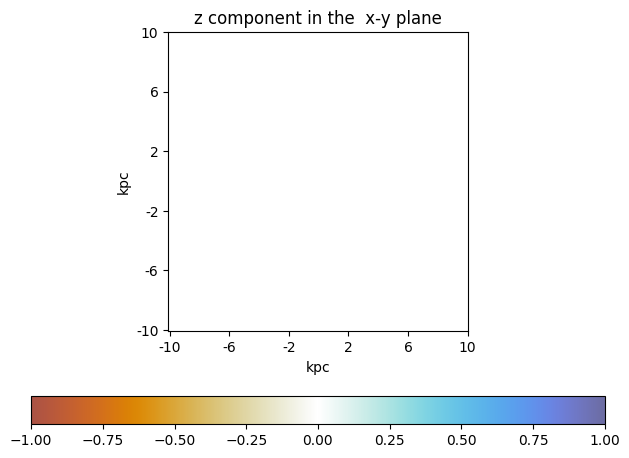

In [21]:
plot_slice(model_on_grid, 2, 2, shape, refpoint, increment, vmin, vmax)

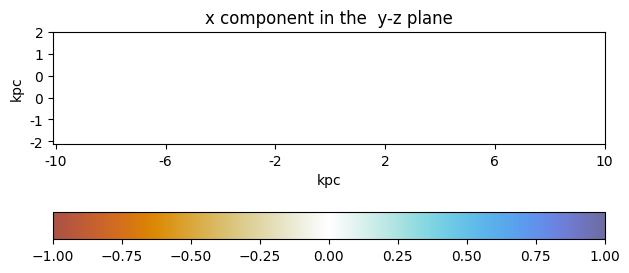

In [22]:
plot_slice(model_on_grid, 0, 1, shape, refpoint, increment, vmin, vmax)

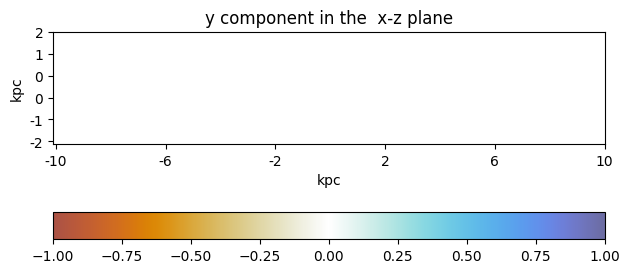

In [23]:
plot_slice(model_on_grid, 1, 1, shape, refpoint, increment, vmin, vmax)

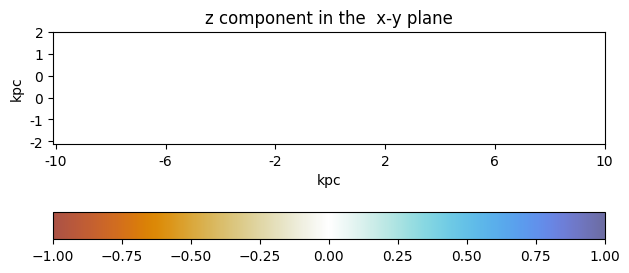

In [24]:
plot_slice(model_on_grid, 2, 1, shape, refpoint, increment, vmin, vmax)

### 2. The parameters

**TBD**